# 2016년 가구마스터 데이터를 이용한 재현자료 구현 

## 선택한 변수 : 
범주형 변수 : 수도권 여부 , 가구주 성별 , 학교(학력코드) , 나이   
연속형 변수 : 근로소득 , 사업소득 , 재산소득 , 공적이전소득 , 사적이전소득

* 수도권 여부 : G1 (수도권) , G2 (비수도권)
* 가구주 성별 : 1 (남자) , 2 (여자)
* 학력코드(학교) : 1 (안받음) , 2 (초등학교) , 3 (중학교) , 4 (고등학교) , 5 (대학 (3년제 이하)) , 6 (대학교 (4년제 이상)) , 7 (대학원 이상)
* 가구주 나이 : G1 (30세 미만) , G2 (30 ~ 40세 미만) , G3 (40 ~ 50세 미만) , G4 (50 ~ 60세 미만) , G5 (60세이상)

## 변수 설명 

경상소득 : 비교적 오랫동안 정기적으로 얻는 소득  
( 경상소득 = 근로소득 + 사업소득 + 재산소득 + 공적이전소득 + 사적이전소득 )
1.   근로소득 : 사업체에 고용되어 근로를 제공한 대가로 받은 모든 현금과 현물을 의미한다. 여기에서 현물이란 가구소득 정의에서와 마찬가지로 재화와 서비스를 포함하는 개념.  
2.   사업소득 : 비법인기업의 주인이 해당 사업체를 운영하여 얻은 순수입이다. 여기에서 순수입이란 총수입액 또는 총매출액에서 영업비용 등 생산에 사용한 생산비용을 제외한 금액을 의미한다.
3.   재산소득 : 소유한 재산을 타인이 사용한 대가로 받은 순수입이다. 여기에는 임대소득, 이자소득, 배당소득, 연금소득, 상표 사용료/인세/사용료 등이 포함된다.
  * 임대소득은 기본적으로 주택, 건물, 토지, 기계장비 등의 자산을 빌려주고 받은 소득을 의미한다. 그런데 통계청에서는 토지 임대소득만 재산소득에 포함시키고 그 외의 부동산과 기계장비 임대소득은 사업소득으로 분류합니다.
  *   이자소득은 저금이나 채권 등으로 얻은 이자수입 또는 다른 가구나 사업체에 돈을 빌려주고 받은 이자수입을 의미한다.
  *   배당소득은 직접 업무에는 참여하지 않고 투자만 한 사업체로부터 받은 수입을 의미한다.
  *   상표 사용료/인세/사용료는 저서나 창작물 등 특허나 저작권이 있는 자료를 사용하게 해준 대가로 받은 소득을 의미한다.
4. 공적이전소득 : 국민연금, 공무원연금 등의 공적연금, 기초연금 등을 일컫는다. 
5. 사적이전소득 : 부양의무자 또는 후원자 등으로부터 정기적으로 지원받는 금품





# 데이터 불러오기


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
myfile = files.upload()

Saving 2016_housemasterdata.csv to 2016_housemasterdata (1).csv


In [1]:
import io
import pandas as pd
rawdata = pd.read_csv(('C:/Users/2jjsj/2016_housemasterdata.csv'), encoding='cp949')

# 데이터 종류 확인 작업 및 추출 

원자료 = rawdata 라는 변수로 선언한다.

In [ ]:
rawdata.head()

,조사연도,MD제공용_가구고유번호,조사부문코드,가중값,가중값(금융부문),가중값(복지부문),수도권여부,가구주_성별코드,가구원수,노인가구코드,...,가구주_은퇴여부,가구주_미은퇴_은퇴연령,가구주_미은퇴_최소생활비,가구주_미은퇴_적정생활비,가구주_미은퇴_노후준비상황코드,가구주_은퇴실제연령,가구주_은퇴시_적정생활비충당여부,가구주은퇴_생활비재원마련코드(2014년~),1년후소득변화코드(2011~2016년),1년후지출변화코드(2012~2016년)
0,2016,10200111,F,1617.978816,3233.552036,NaN,G1,1,4,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016,10200121,F,1909.519990,3816.200922,NaN,G1,1,4,G2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016,10200151,P,1866.504932,NaN,3735.789099,G1,2,3,G2,...,1.0,60.0,300.0,300.0,3.0,NaN,NaN,NaN,3.0,2.0
3,2016,10200161,P,1355.027490,NaN,2736.042354,G1,1,5,G2,...,1.0,70.0,250.0,300.0,4.0,NaN,NaN,NaN,3.0,3.0
4,2016,10200171,P,1740.443092,NaN,3483.477712,G1,1,2,G2,...,1.0,60.0,200.0,300.0,5.0,NaN,NaN,NaN,3.0,3.0


원자료의 형식을 보면 연속형은 int64 or float64로 나타나고 범주형은 object로 표현된다.

In [ ]:
rawdata.info(verbose=True) # 데이터 생략된(...) 부분을 표시하게 해주는 함수
rawdata.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18273 entries, 0 to 18272
Data columns (total 168 columns):
 #    Column                                                 Dtype  
---   ------                                                 -----  
 0    조사연도                                                   int64  
 1    MD제공용_가구고유번호                                           int64  
 2    조사부문코드                                                 object 
 3    가중값                                                    float64
 4    가중값(금융부문)                                              float64
 5    가중값(복지부문)                                              float64
 6    수도권여부                                                  object 
 7    가구주_성별코드                                               int64  
 8    가구원수                                                   int64  
 9    노인가구코드                                                 object 
 10   조손가구코드                                                 o

조사연도                         int64
MD제공용_가구고유번호                 int64
조사부문코드                      object
가중값                        float64
가중값(금융부문)                  float64
                            ...   
가구주_은퇴실제연령                 float64
가구주_은퇴시_적정생활비충당여부          float64
가구주은퇴_생활비재원마련코드(2014년~)    float64
1년후소득변화코드(2011~2016년)      float64
1년후지출변화코드(2012~2016년)      float64
Length: 168, dtype: object

In [ ]:
rawdata.shape

(18273, 168)

원자료에서 유용한 데이터 추출 

In [2]:
variable = ['수도권여부','가구주_성별코드','가구주_교육정도_학력코드','가구주_연령10세단위코드','경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]']
oridata = rawdata[variable]
oridata.rename(columns = {'경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]' : "경상소득_사적이전소득(조사)"},inplace=True)

C:\Users\2jjsj\AppData\Local\Temp\ipykernel_16228\2374648471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oridata.rename(columns = {'경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]' : "경상소득_사적이전소득(조사)"},inplace=True)


In [ ]:
oridata # 나중에는 변수이름 영어로 변환하는 것을 추천

,수도권여부,가구주_성별코드,가구주_교육정도_학력코드,가구주_연령10세단위코드,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,G1,1,4,G3,9000,4000,5000,0,0,0
1,G1,1,6,G3,3216,3000,0,0,216,0
2,G1,2,6,G4,12600,12600,0,0,0,0
3,G1,1,5,G3,4560,0,4200,0,360,0
4,G1,1,6,G2,12420,12420,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
18268,G2,2,2,G5,1062,888,100,0,74,0
18269,G2,2,1,G5,288,0,0,40,248,0
18270,G2,1,5,G3,4540,4500,0,40,0,0
18271,G2,1,2,G4,2160,2160,0,0,0,0


In [ ]:
oridata['경상소득_사적이전소득(조사)']

0        0
1        0
2        0
3        0
4        0
        ..
18268    0
18269    0
18270    0
18271    0
18272    0
Name: 경상소득_사적이전소득(조사), Length: 18273, dtype: int64

결측값 조사 

In [ ]:
oridata.isnull().sum()

수도권여부              0
가구주_성별코드           0
가구주_교육정도_학력코드      0
가구주_연령10세단위코드      0
경상소득(조사)           0
경상소득_근로소득(조사)      0
경상소득_사업소득(조사)      0
경상소득_재산소득(조사)      0
경상소득_공적이전소득(조사)    0
경상소득_사적이전소득(조사)    0
dtype: int64

# CTGAN 패키지 설치 및 다른 시각화 패키지 설치 

colab에서 실행할때는 매번 설치해야되지만 colab이 아닌 로컬환경의 경우에는 설치를 매번 할 필요가 없다.

## CTGAN 패키지 설치

In [3]:
import sdv
from sdv.metadata import SingleTableMetadata # 싱글 메타 데이터의 경우에만! 멀티 메타 데이터의 경우에는 패키지를 다르게 불러와야함
from sdv.single_table import CTGANSynthesizer


## 시각화 패키지 설치 

In [4]:

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
plt.rc('font', family='NanumBarunGothic')

In [5]:
import pandas as pd 
sampledata = oridata.sample(n=5 , replace= False)

In [6]:
sampledata

,수도권여부,가구주_성별코드,가구주_교육정도_학력코드,가구주_연령10세단위코드,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
17973,G2,1,4,G5,1980,0,0,480,300,1200
11976,G1,1,2,G5,1348,960,0,0,388,0
3277,G2,2,2,G5,3602,3000,0,0,362,240
7243,G2,1,6,G4,5880,5880,0,0,0,0
2062,G1,2,5,G2,4500,0,4500,0,0,0


# CTGAN 실행 

synthetic_data = 전체재현자료이다.  
epoch 수는 100으로 맞췄음 

In [7]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data = sampledata)
synthesizer = CTGANSynthesizer(
    metadata, # required
    enforce_rounding=False,
    epochs=100,
    verbose=False
)
synthesizer.fit(sampledata)
synthetic_data = synthesizer.sample(num_rows = 5, batch_size = 20)

Sampling rows: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 37.69it/s]


In [ ]:
from google.colab import files
myfile = files.upload()

Saving synthetic.csv to synthetic (1).csv


In [ ]:
synthetic_data = pd.read_csv(io.BytesIO(myfile['synthetic.csv']), encoding='UTF-8')
synthetic_data.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
synthetic_data

,수도권여부,가구주_성별코드,가구주_교육정도_학력코드,가구주_연령10세단위코드,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,G1,2,4,G5,315,1040,0,5,253,957
1,G2,1,6,G5,5356,14283,7,5,316,1
2,G1,1,7,G4,11527,6624,8084,558,0,0
3,G2,1,3,G5,2548,27,0,5,0,1
4,G2,1,4,G4,4107,1999,27,0,0,132
...,...,...,...,...,...,...,...,...,...,...
18268,G2,2,3,G5,2853,1696,0,5,681,1
18269,G1,1,4,G3,7507,2372,4,4,0,0
18270,G2,2,3,G4,3362,3806,13,3,81,1
18271,G1,1,7,G3,8629,0,20,1,0,1


# 연속형 자료 산점도

C:\Users\2jjsj\anaconda3\envs\statistic\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\2jjsj\anaconda3\envs\statistic\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\2jjsj\anaconda3\envs\statistic\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
C:\Users\2jjsj\anaconda3\envs\statistic\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 46301 (\N{HANGUL SYLLABLE DEUG}) missing from current font.
  func(*args, **kwargs)
C:\Users\2jjsj\anaconda3\envs\statistic\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
C:\Users\2jjsj\anaconda3\envs\statistic\lib\site-packages\IPyt

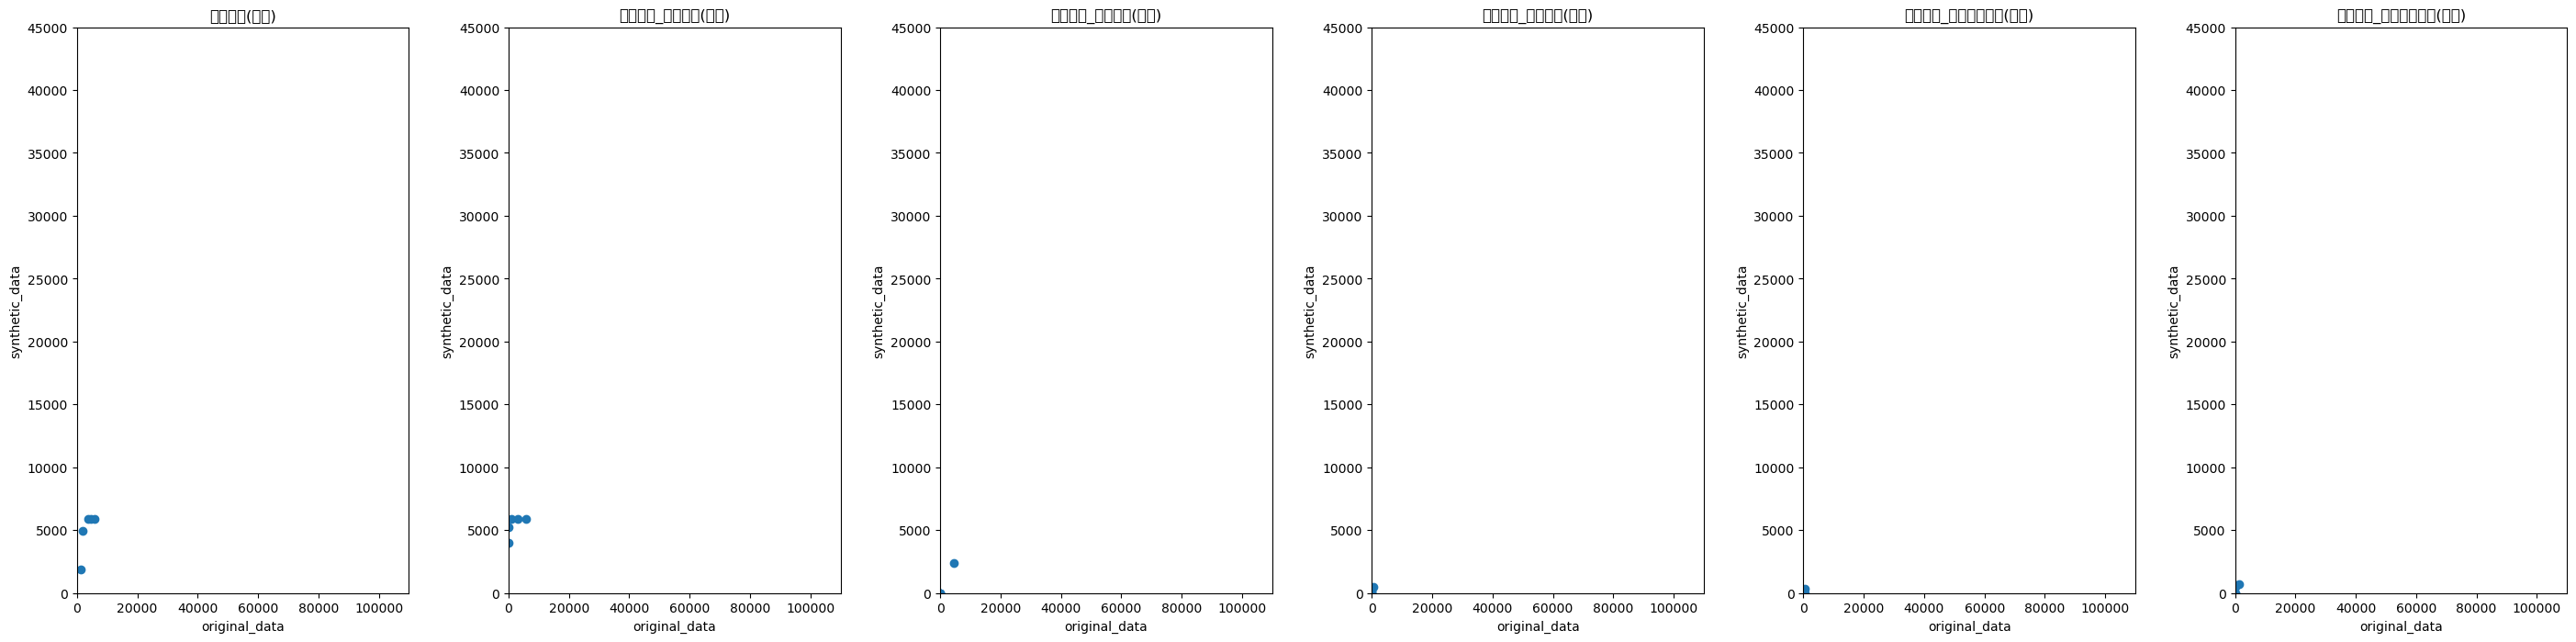

In [8]:
fig, axs = plt.subplots(1, 6, figsize=(35, 8))
plt.subplots_adjust(wspace=0.3)
numerics = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
for i in range (6) :
  axs[i].scatter(sampledata[numerics[i]].sort_values(),synthetic_data[numerics[i]].sort_values())
  axs[i].set_title(numerics[i])
  axs[i].set_xlabel('original_data', fontsize=10)
  axs[i].set_ylabel('synthetic_data', fontsize=10)
  axs[i].set_xlim(0,110000)
  axs[i].set_ylim(0,45000)

In [ ]:
def scatter(a,x,y): # x : original_data , y : synthetic_data
  plt.scatter(x.sort_values(a,ascending=True)[a],y.sort_values(a,ascending=True)[a])
  plt.title(a)
  plt.xlim(0,100000)
  plt.ylim(0,100000)
  plt.xlabel("original data")
  plt.ylabel("synthetic data")
  plt.show()  

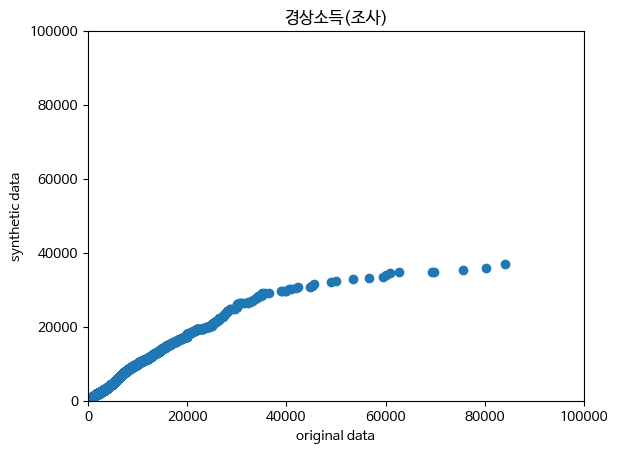

In [ ]:
scatter("경상소득(조사)", oridata , synthetic_data)

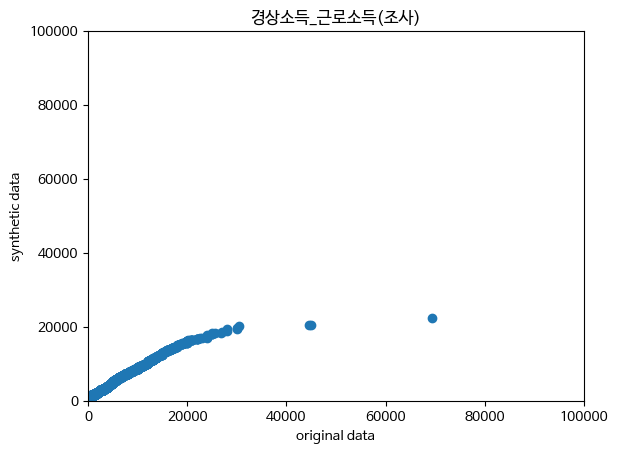

In [ ]:
scatter("경상소득_근로소득(조사)", oridata , synthetic_data)

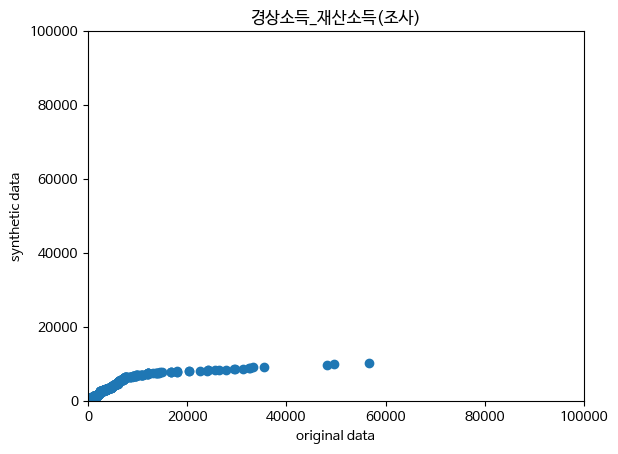

In [ ]:
scatter("경상소득_재산소득(조사)", oridata , synthetic_data)

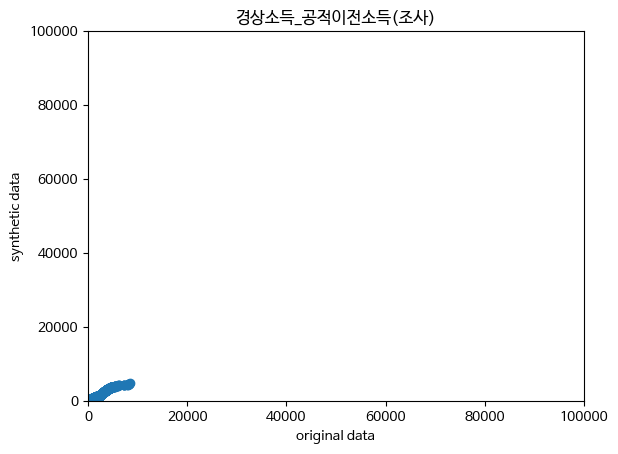

In [ ]:
scatter("경상소득_공적이전소득(조사)", oridata , synthetic_data)

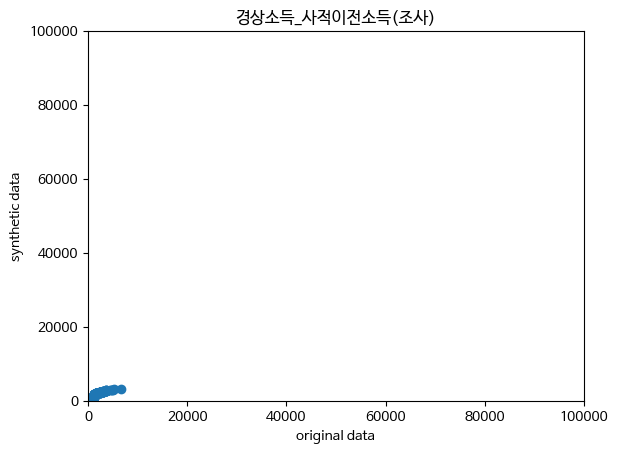

In [ ]:
scatter("경상소득_사적이전소득(조사)", oridata , synthetic_data)

# 범주별 막대그래프 

## 성별 변수 막대그래프

In [ ]:
import numpy as np

In [ ]:
oridata['가구주_성별코드'].value_counts()

1    13887
2     4386
Name: 가구주_성별코드, dtype: int64

In [ ]:
synthetic_data['가구주_성별코드'].value_counts()

1    14537
2     3736
Name: 가구주_성별코드, dtype: int64

In [ ]:
sample_men = oridata[oridata['가구주_성별코드']==1].value_counts() # 1 = 남자 
sample_women = oridata[oridata['가구주_성별코드']==2].value_counts() # 2 = 여자
new_data_men = synthetic_data[synthetic_data['가구주_성별코드']==1].value_counts()
new_data_women = synthetic_data[synthetic_data['가구주_성별코드']==2].value_counts()

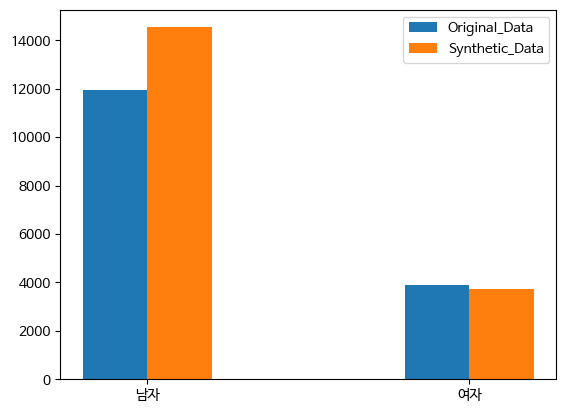

In [ ]:
# Define Data

gender = ["남자","여자"]
original = [len(sample_men),len(sample_women)]
news_data = [len(new_data_men),len(new_data_women)]
x_axis = np.arange(len(gender))

# Multi bar Chart

plt.bar(x_axis +0.20, original, width=0.2, label = 'Original_Data')
plt.bar(x_axis +0.20*2, news_data, width=0.2, label = 'Synthetic_Data')

# Xticks

plt.xticks(x_axis+0.3,gender)

# Add legend

plt.legend()

# Display

plt.show()

## 지역 변수 막대그래프 

In [ ]:
sample_capital = oridata[oridata['수도권여부']=='G1'].value_counts() # G1 = 수도권 
sample_province = oridata[oridata['수도권여부']=='G2'].value_counts() # G2 = 지방
new_data_capital = synthetic_data[synthetic_data['수도권여부']=='G1'].value_counts()
new_data_province = synthetic_data[synthetic_data['수도권여부']=='G2'].value_counts()

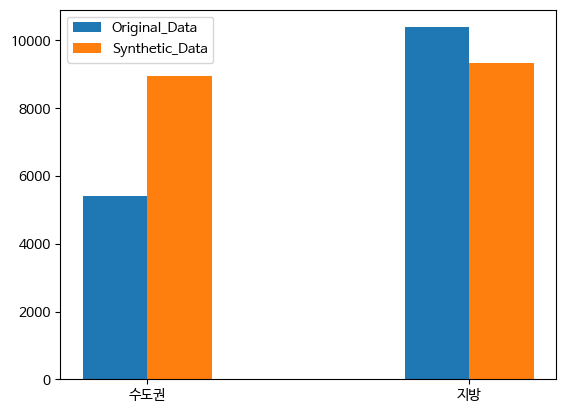

In [ ]:
# Define Data

region = ["수도권","지방"] 
original = [len(sample_capital),len(sample_province)]
news_data = [len(new_data_capital),len(new_data_province)]
x_axis = np.arange(len(region))

# Multi bar Chart

plt.bar(x_axis +0.20, original, width=0.2, label = 'Original_Data')
plt.bar(x_axis +0.20*2, news_data, width=0.2, label = 'Synthetic_Data')

# Xticks

plt.xticks(x_axis+0.3,region)

# Add legend

plt.legend()

# Display

plt.show()

# 데이터 로그화

데이터 로그화 

데이터 로그화를 하는 이유는 정규성을 더 잘 보이고 데이터간의 편차를 줄여 (왜도, 첨도)를 줄여서 분석에서 더 정확한 값을 얻기 위해서이다.

In [ ]:
# 데이터 타입이 수치형인 칼럼만 채택
import pandas as pd
numeric = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
col1 = oridata[numeric]
log_df1 = np.log1p(col1) # log1p를 한 이유는 일반 log 함수를 썼을 때 0이 -inf로 나오는 오류때문
log_df1

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,9.105091,8.294300,8.517393,0.000000,0.000000,0.0
1,8.076205,8.006701,0.000000,0.000000,5.379897,0.0
2,9.441531,9.441531,0.000000,0.000000,0.000000,0.0
3,8.425297,0.000000,8.343078,0.000000,5.888878,0.0
4,9.427144,9.427144,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...
18268,6.968850,6.790097,4.615121,0.000000,4.317488,0.0
18269,5.666427,0.000000,0.000000,3.713572,5.517453,0.0
18270,8.420903,8.412055,0.000000,3.713572,0.000000,0.0
18271,7.678326,7.678326,0.000000,0.000000,0.000000,0.0


재현 자료 로그화 

In [ ]:
col2 = synthetic_data[numeric]
log_df2 = np.log1p(col2)
log_df2

,경상소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
0,5.755742,6.947937,0.000000,1.791759,5.537334,6.864848
1,8.586159,9.566895,2.079442,1.791759,5.758902,0.693147
2,9.352534,8.798606,8.997766,6.326149,0.000000,0.000000
3,7.843456,3.332205,0.000000,1.791759,0.000000,0.693147
4,8.320692,7.600902,3.332205,0.000000,0.000000,4.890349
...,...,...,...,...,...,...
18268,7.956477,7.436617,0.000000,1.791759,6.525030,0.693147
18269,8.923724,7.771910,1.609438,1.609438,0.000000,0.000000
18270,8.120589,8.244597,2.639057,1.386294,4.406719,0.693147
18271,9.063000,0.000000,3.044522,0.693147,0.000000,0.693147


# 연속형 자료 상자그림 

연속형 자료 전체에 대한 상자그림 

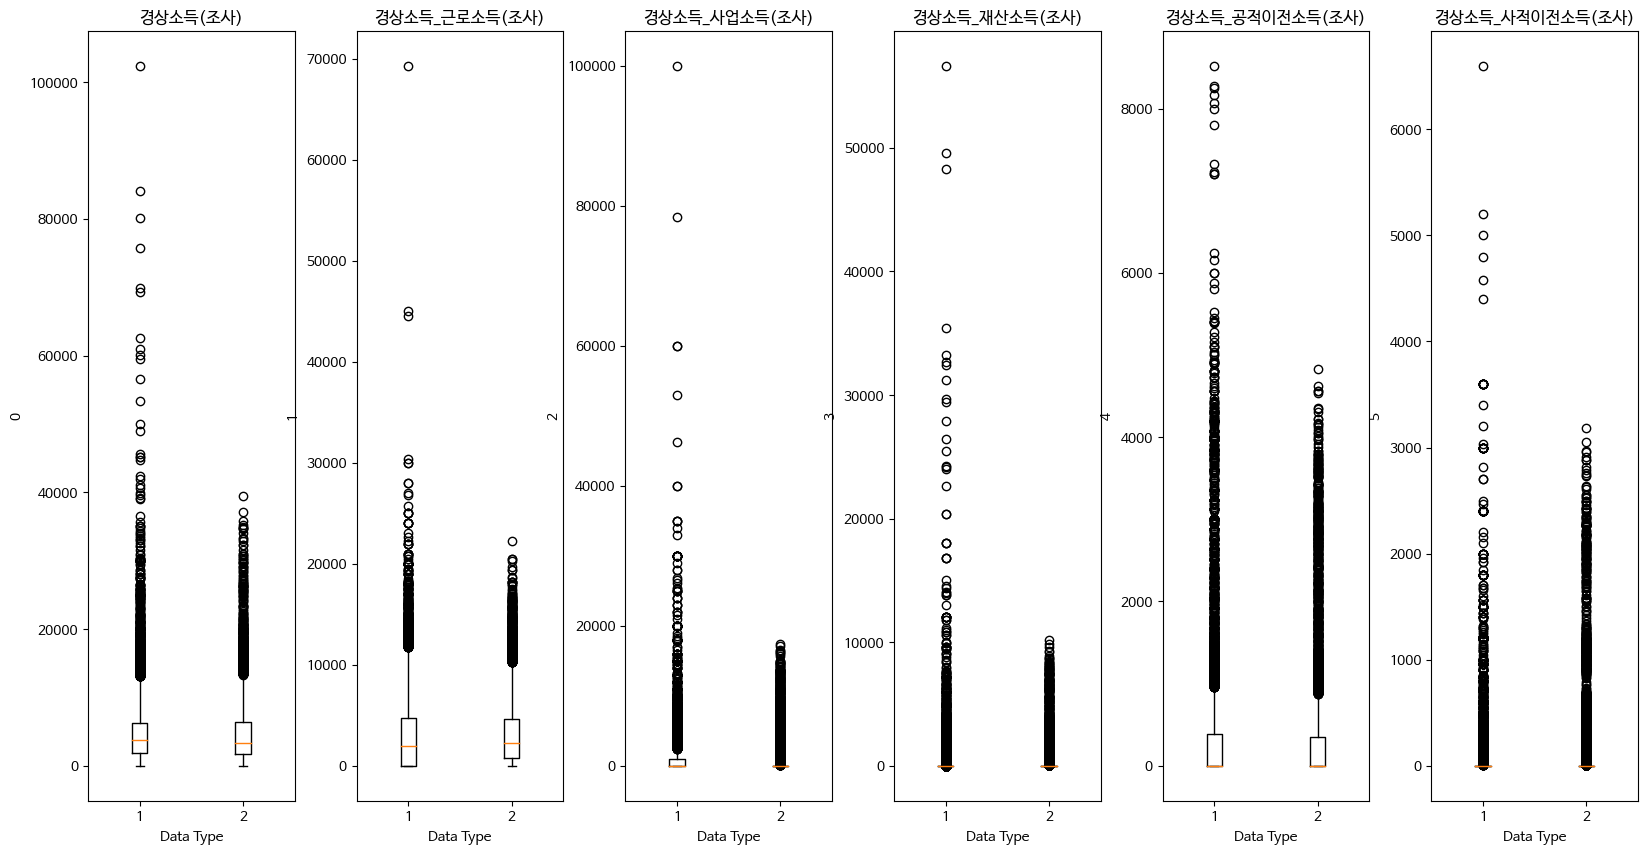

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(20, 10))
plt.subplots_adjust(wspace=0.3)
numerics = ['경상소득(조사)','경상소득_근로소득(조사)','경상소득_사업소득(조사)','경상소득_재산소득(조사)','경상소득_공적이전소득(조사)','경상소득_사적이전소득(조사)']
for i in range (6) :
  axs[i].boxplot([oridata[numerics[i]],synthetic_data[numerics[i]]])
  axs[i].set_title(numerics[i])
  axs[i].set_xlabel('Data Type')
  axs[i].set_ylabel(i)

연속형자료 상자그림 함수

In [ ]:
def boxplot(a):
  plt.rcParams['figure.figsize'] = [15, 10]
  fig, ax = plt.subplots()
  ax.boxplot([oridata[a],synthetic_data[a]],notch=True)
  ax.set_xlabel('Data Type')
  ax.set_ylabel(a)
  plt.xticks([1,2], ['original_data','synthetic_data'])

## 경상소득(조사)

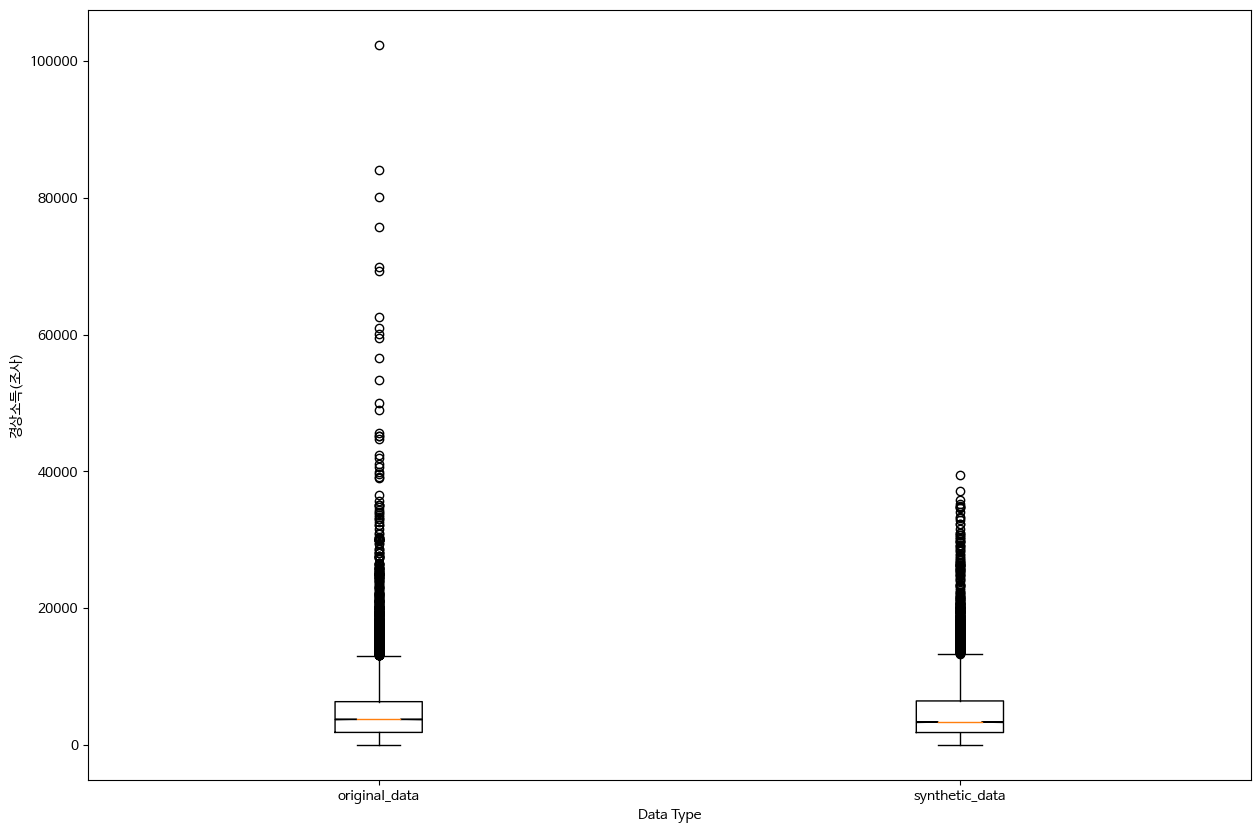

In [ ]:
boxplot('경상소득(조사)')

로그데이터 상자그림 함수 

In [ ]:
def logboxplot(a) : 
  plt.rcParams['figure.figsize'] = [15, 10]
  fig, ax = plt.subplots()
  ax.boxplot([log_df1[a],log_df2[a]],notch=True)
  ax.set_xlabel('Data Type')
  ax.set_ylabel(a)
  plt.xticks([1,2], ['original_data','synthetic_data'])

로그화된 데이터를 이용한 상자그림

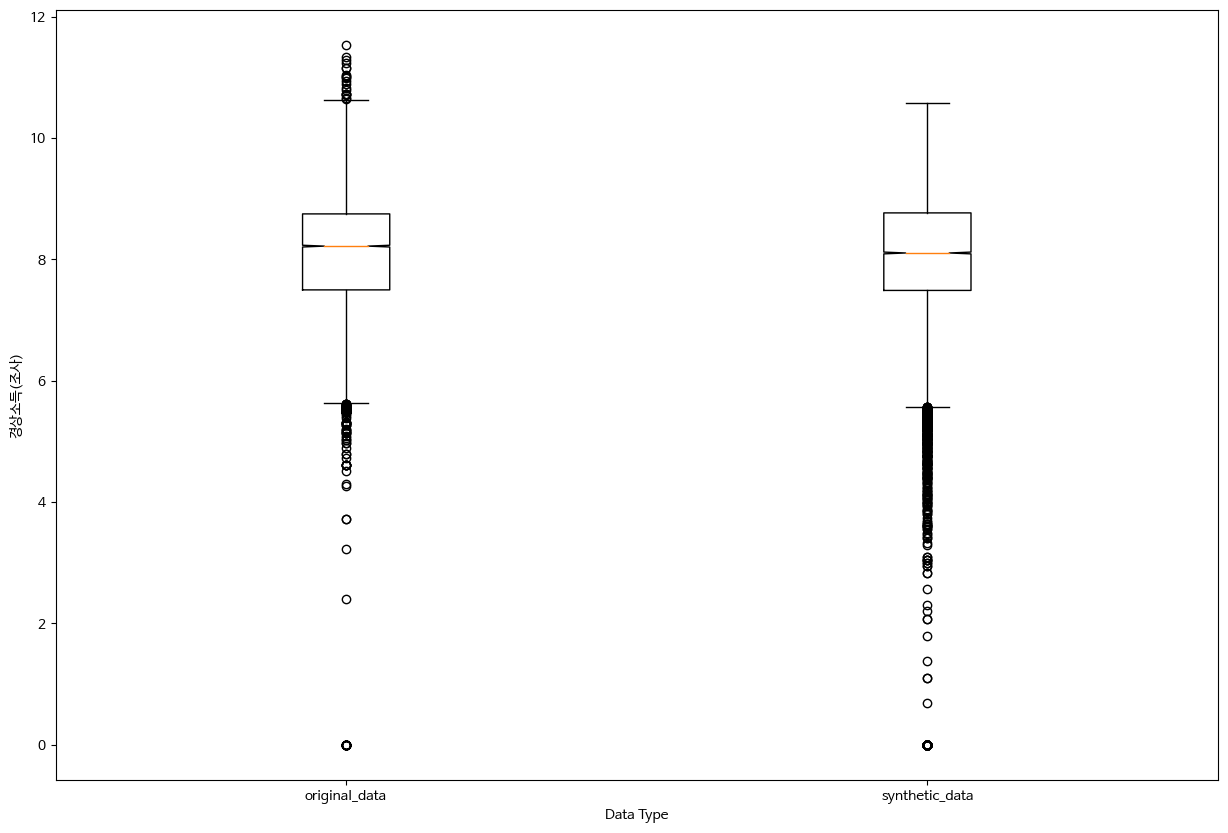

In [ ]:
logboxplot('경상소득(조사)')

## 경상소득_근로소득(조사)

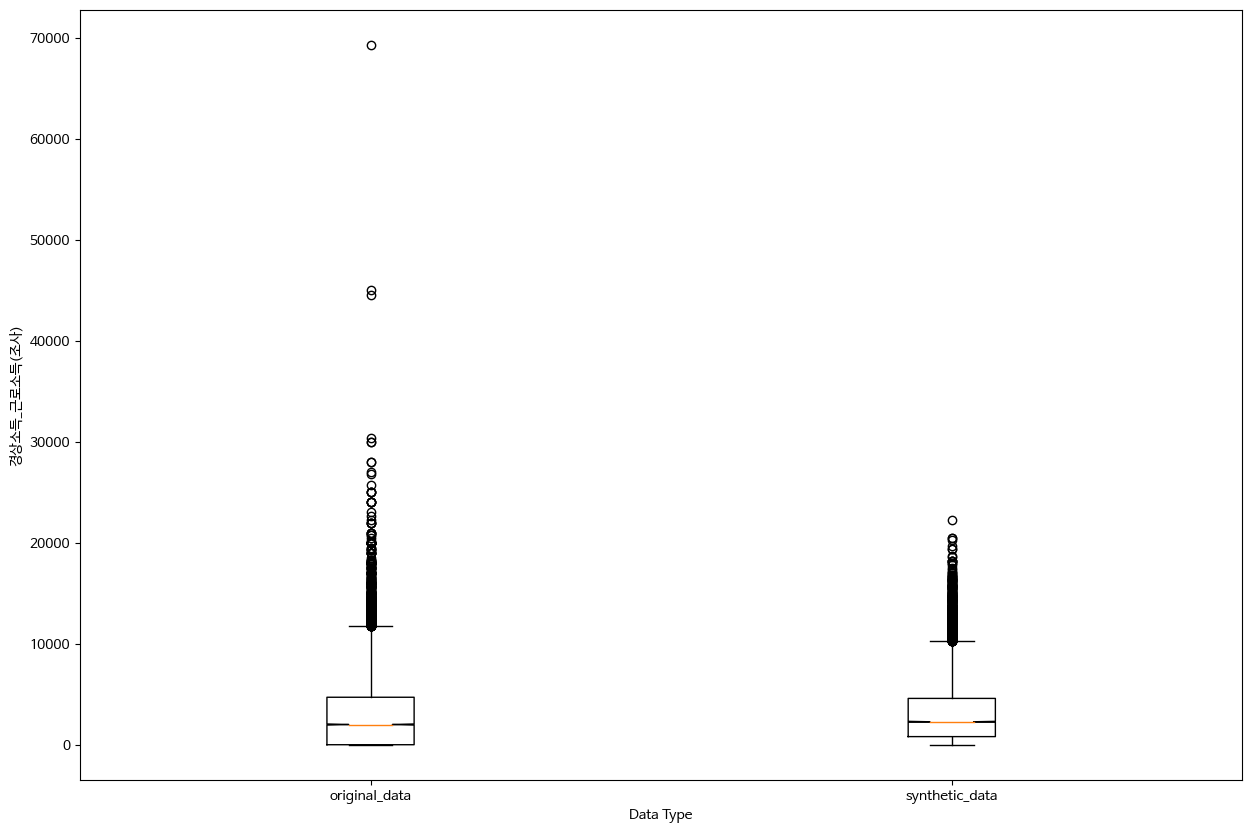

In [ ]:
boxplot('경상소득_근로소득(조사)')

로그화된 데이터를 이용한 상자그림

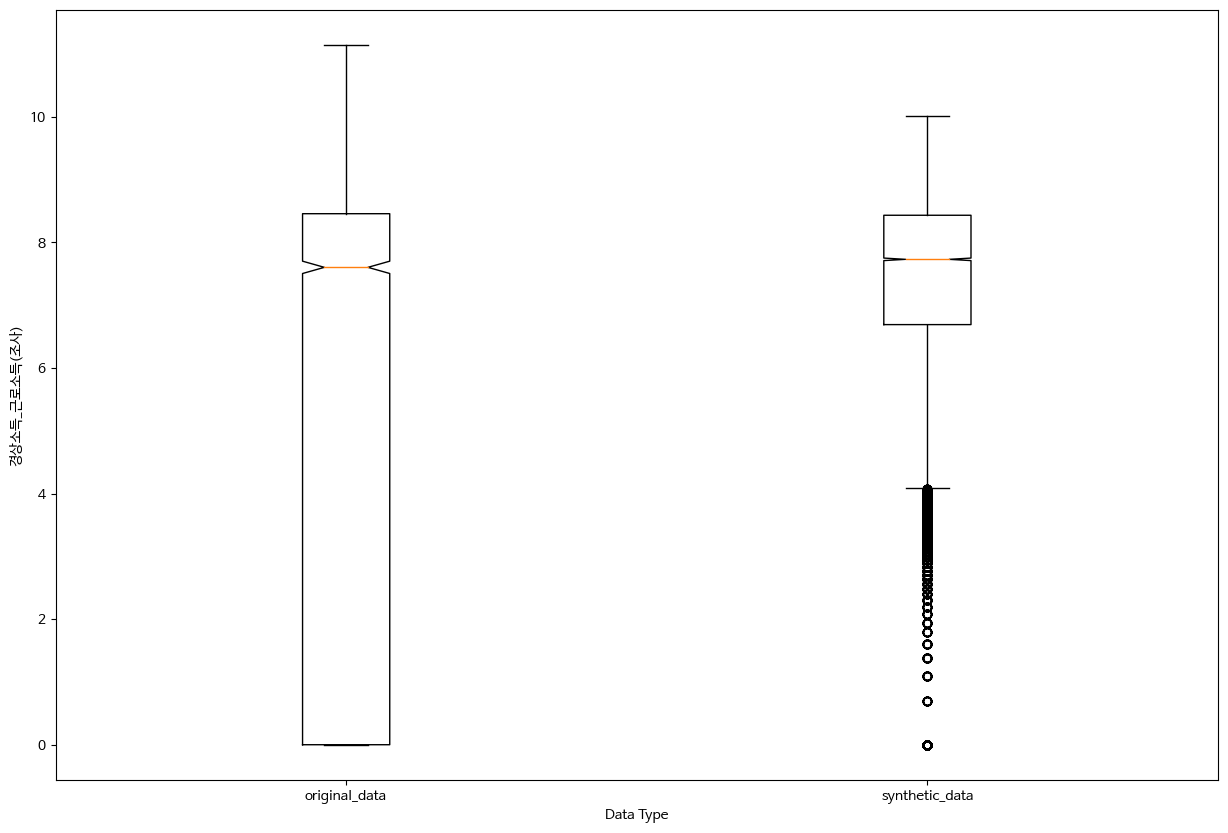

In [ ]:
logboxplot('경상소득_근로소득(조사)')

## 경상소득_사업소득(조사)

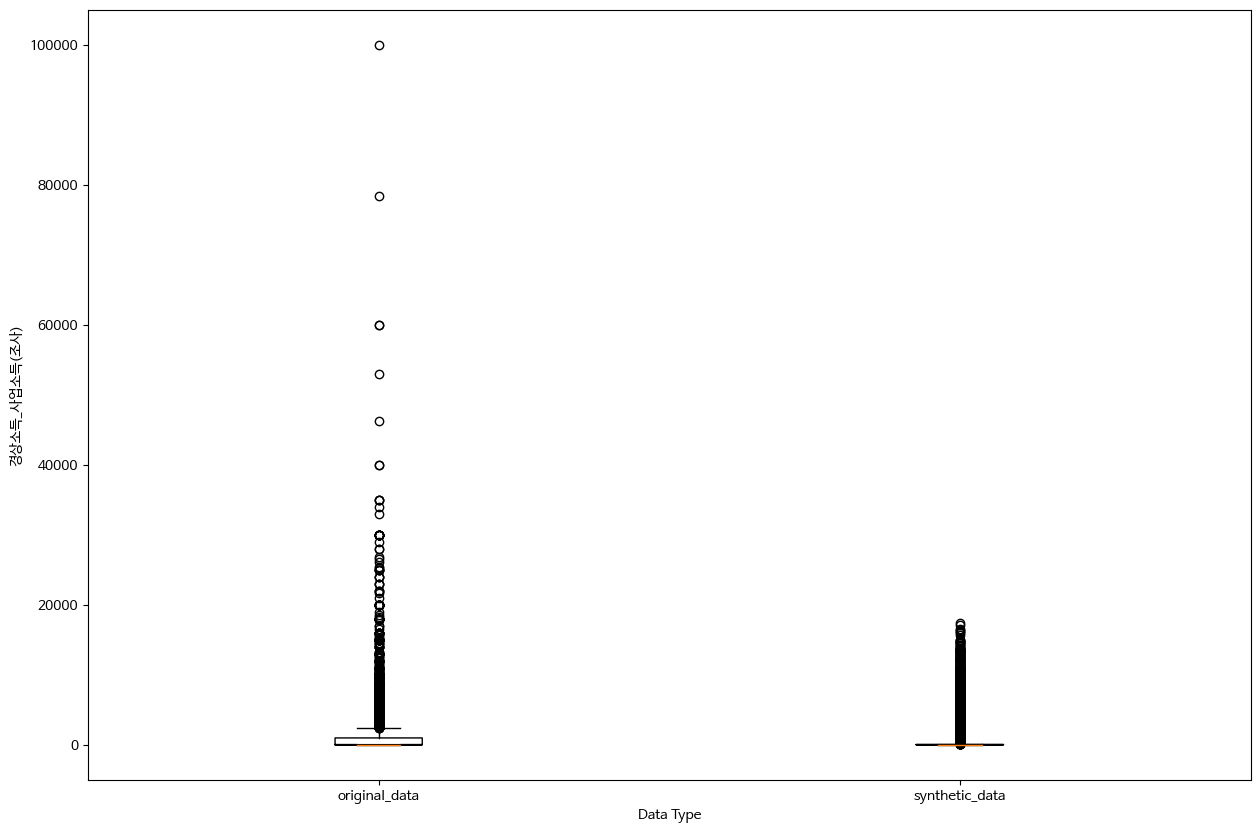

In [ ]:
boxplot('경상소득_사업소득(조사)')

로그화된 데이터를 이용한 상자그림

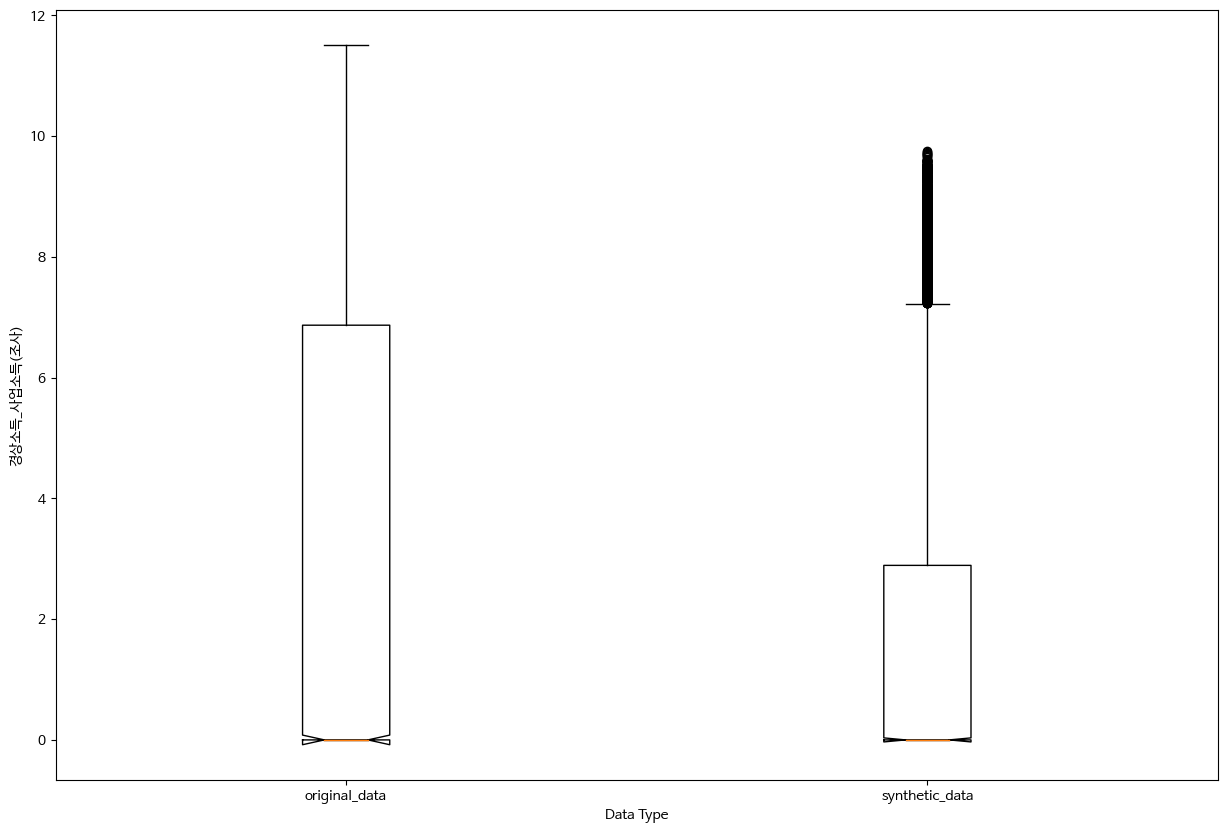

In [ ]:
logboxplot('경상소득_사업소득(조사)')

## 경상소득_재산소득(조사)

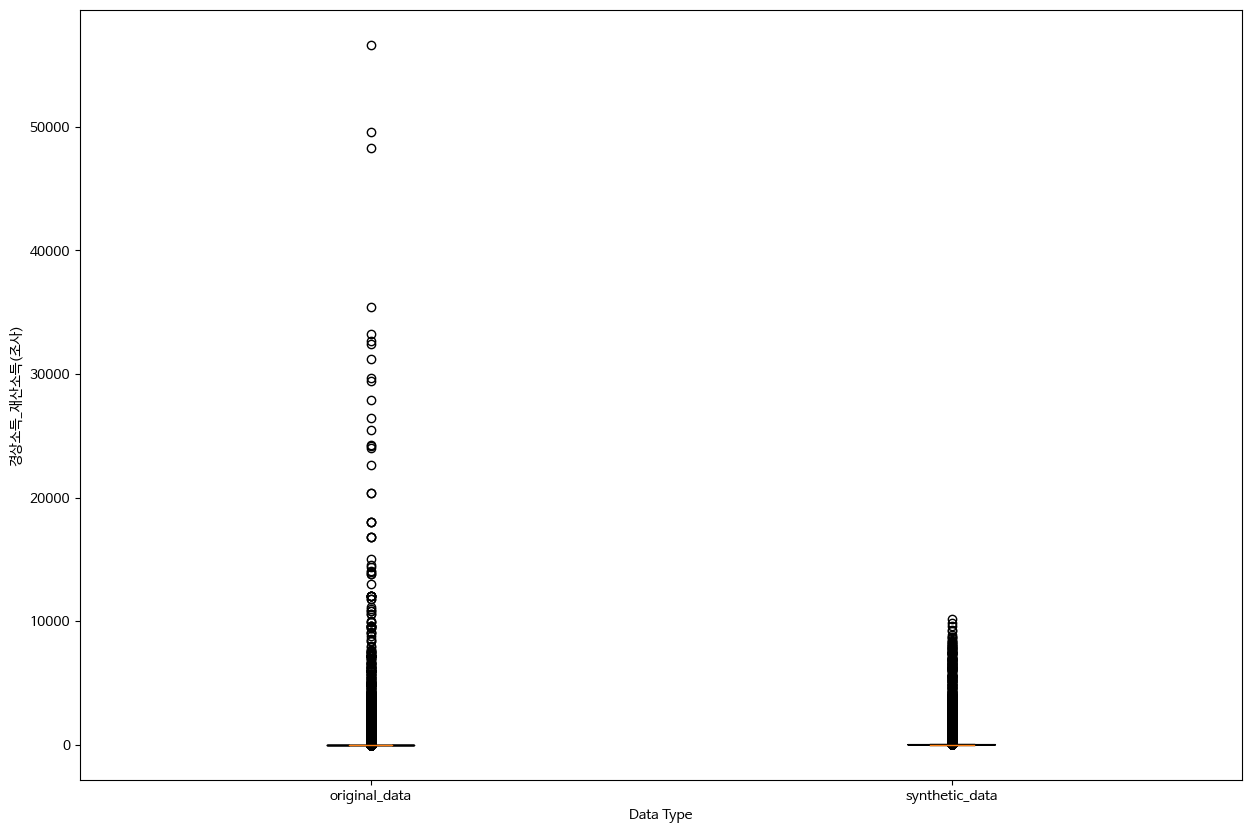

In [ ]:
boxplot('경상소득_재산소득(조사)')

로그화된 데이터를 이용한 상자그림

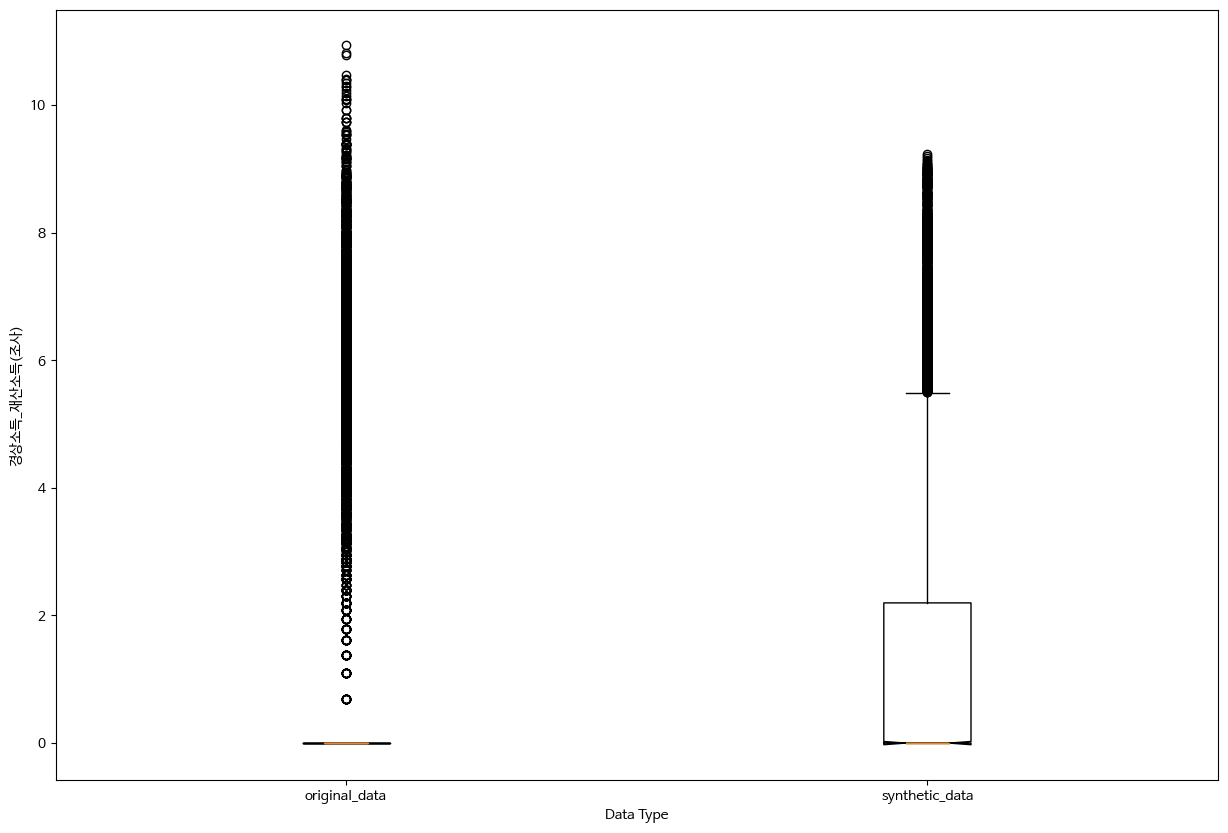

In [ ]:
logboxplot('경상소득_재산소득(조사)')

## 경상소득_공적이전소득(조사)

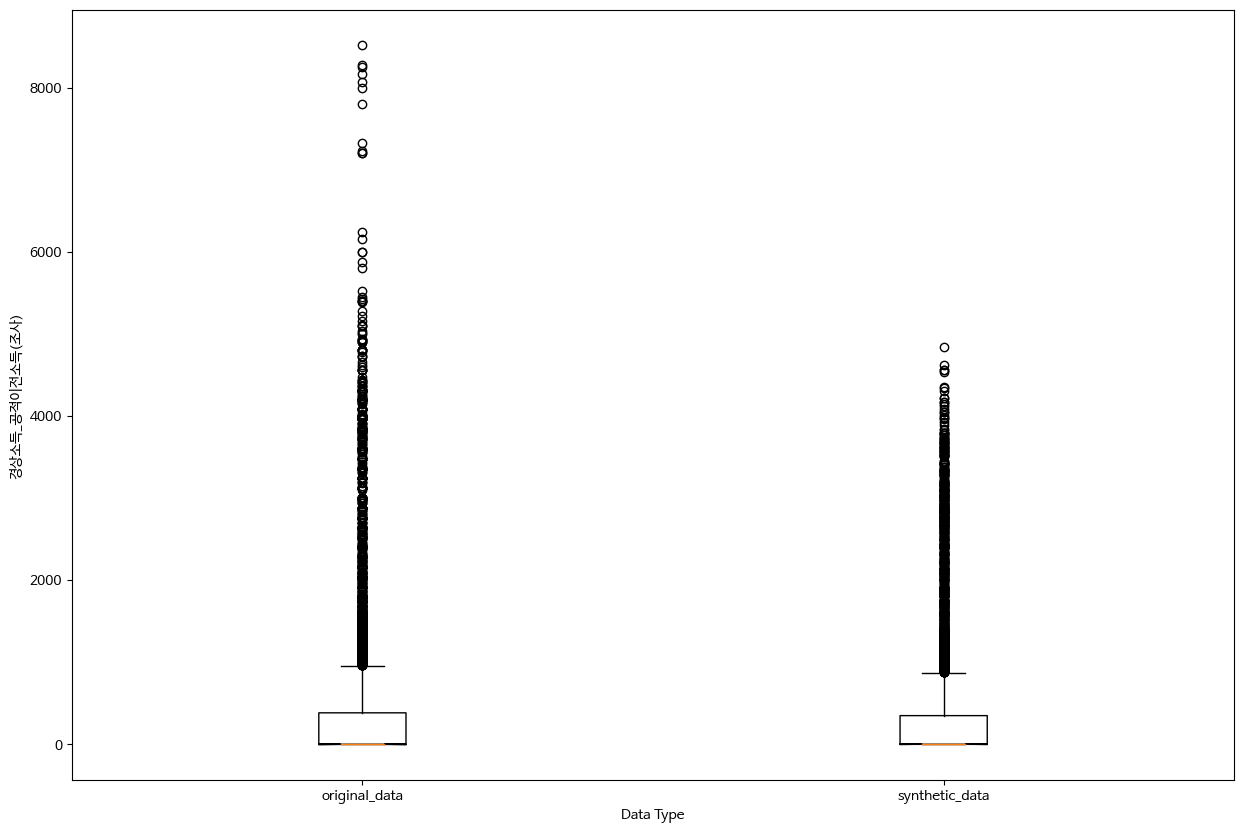

In [ ]:
boxplot('경상소득_공적이전소득(조사)')

로그화된 데이터를 이용한 상자그림

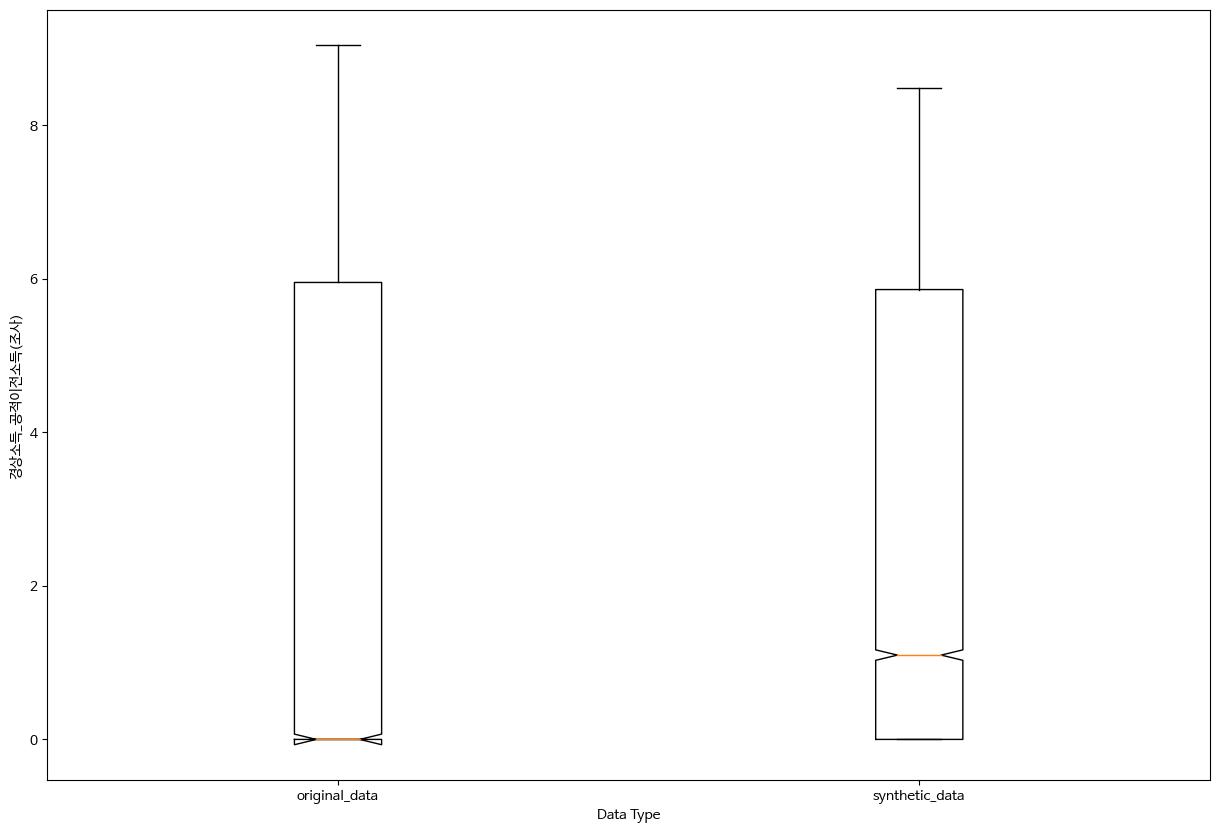

In [ ]:
logboxplot('경상소득_공적이전소득(조사)')

## 경상소득_사적이전소득(조사)

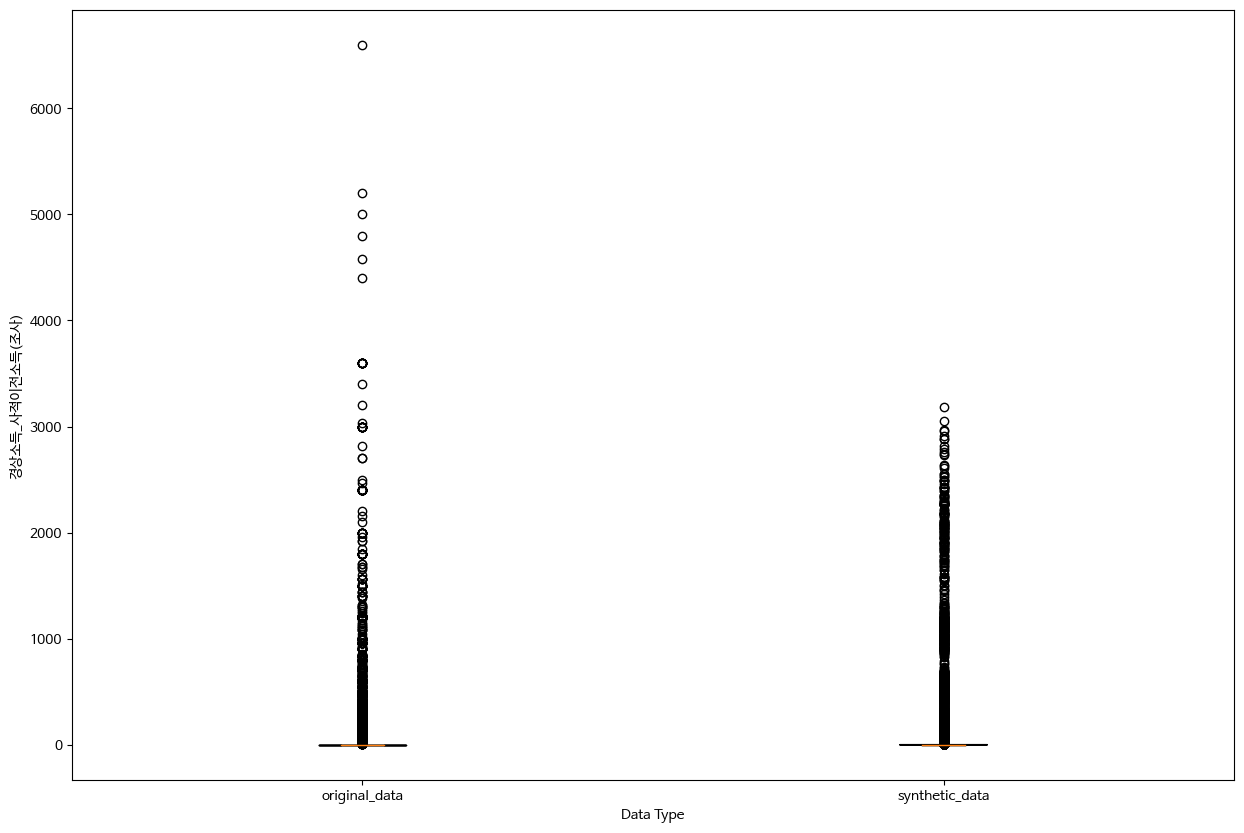

In [ ]:
boxplot('경상소득_사적이전소득(조사)')

로그화된 데이터를 이용한 상자그림

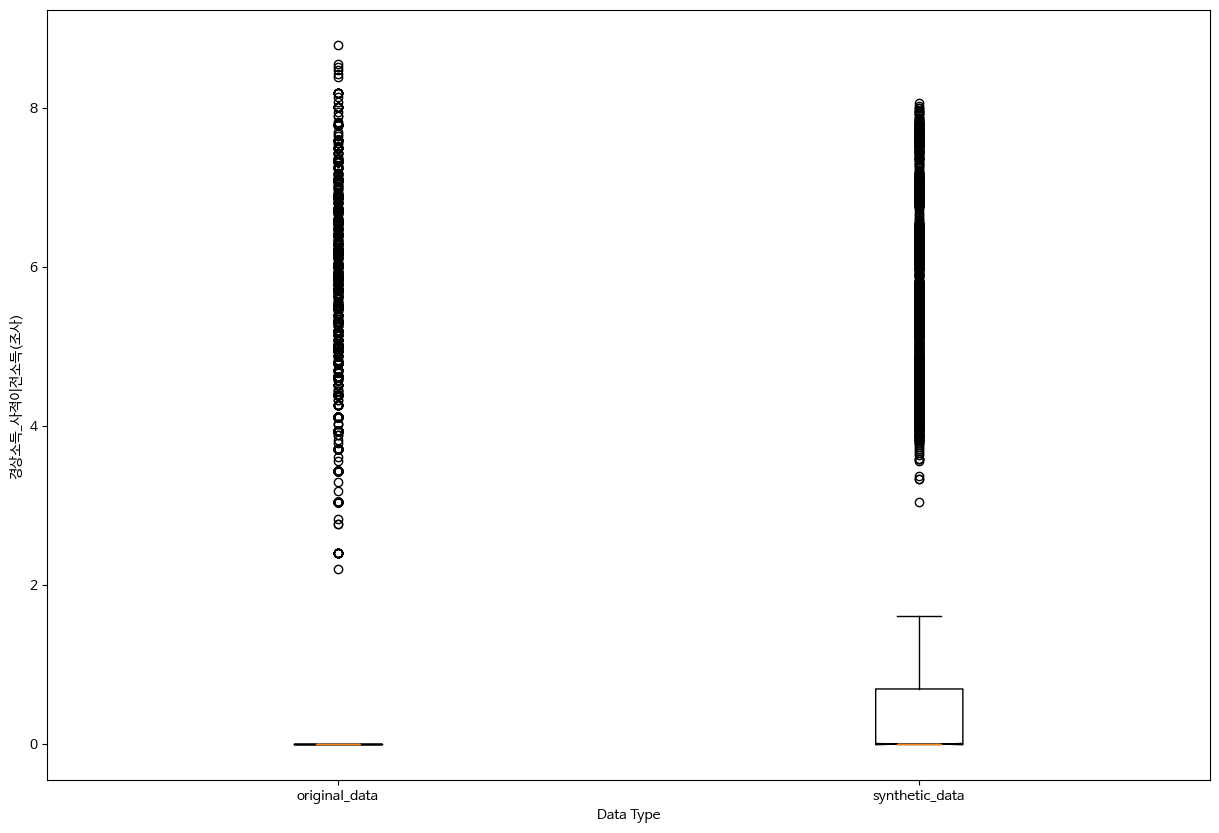

In [ ]:
logboxplot('경상소득_사적이전소득(조사)')

# 기초통계량

기초통계량 함수 

In [ ]:
def summary(a):
  summary1 = pd.DataFrame(oridata[a].describe())
  summary2 = pd.DataFrame(synthetic_data[a].describe())
  colnames=[a]
  result = pd.concat([summary1,summary2],axis=1,keys=['원자료','재현자료'])
  return result

전체 다 비교할 수 있는 기초통계량 

In [ ]:
result1 = summary('경상소득(조사)')
result2 = summary('경상소득_근로소득(조사)')
result3 = summary('경상소득_사업소득(조사)')
result4 = summary('경상소득_재산소득(조사)')
result5 = summary('경상소득_공적이전소득(조사)')
result6 = summary('경상소득_사적이전소득(조사)')
pd.concat([result1,result2,result3,result4,result5,result6],axis=1)
# 더 효율적인 코드로 짤수 있는 방법이 있을까? 

,원자료,재현자료,원자료,재현자료,원자료,재현자료,원자료,재현자료,원자료,재현자료,원자료,재현자료
,경상소득(조사),경상소득(조사),경상소득_근로소득(조사),경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사),경상소득_사적이전소득(조사)
count,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000,18273.000000
mean,4714.715920,4516.852898,2983.012423,3052.258524,1109.992174,706.452580,241.011766,182.500082,307.667050,226.338149,73.032507,64.445083
std,4468.386053,3923.124998,3567.373426,2965.473392,2922.732899,1840.268242,1380.122458,721.696620,656.290218,475.346591,265.860916,243.825127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1800.000000,1784.000000,0.000000,803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3704.000000,3308.000000,2000.000000,2272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
75%,6300.000000,6405.000000,4700.000000,4585.000000,960.000000,17.000000,0.000000,8.000000,384.000000,350.000000,0.000000,1.000000
max,102400.000000,39384.000000,69300.000000,22256.000000,100000.000000,17326.000000,56640.000000,10167.000000,8522.000000,4834.000000,6600.000000,3187.000000


## 경상소득(조사)

In [ ]:
summary('경상소득(조사)')

,원자료,재현자료
,경상소득(조사),경상소득(조사)
count,18273.000000,18273.000000
mean,4714.715920,4516.852898
std,4468.386053,3923.124998
min,0.000000,0.000000
25%,1800.000000,1784.000000
50%,3704.000000,3308.000000
75%,6300.000000,6405.000000
max,102400.000000,39384.000000


## 경상소득_근로소득(조사)

In [ ]:
summary('경상소득_근로소득(조사)')

,원자료,재현자료
,경상소득_근로소득(조사),경상소득_근로소득(조사)
count,18273.000000,18273.000000
mean,2983.012423,3052.258524
std,3567.373426,2965.473392
min,0.000000,0.000000
25%,0.000000,803.000000
50%,2000.000000,2272.000000
75%,4700.000000,4585.000000
max,69300.000000,22256.000000


## 경상소득_사업소득(조사)

In [ ]:
summary('경상소득_사업소득(조사)')

,원자료,재현자료
,경상소득_사업소득(조사),경상소득_사업소득(조사)
count,18273.000000,18273.000000
mean,1109.992174,451.016746
std,2922.732899,1669.289345
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,960.000000,29.000000
max,100000.000000,30376.000000


## 경상소득_재산소득(조사)

In [ ]:
summary('경상소득_재산소득(조사)')

,원자료,재현자료
,경상소득_재산소득(조사),경상소득_재산소득(조사)
count,18273.000000,18273.000000
mean,241.011766,150.993105
std,1380.122458,666.775207
min,0.000000,0.000000
25%,0.000000,4.000000
50%,0.000000,17.000000
75%,0.000000,31.000000
max,56640.000000,16740.000000


## 경상소득_공적이전소득(조사)

In [ ]:
summary('경상소득_공적이전소득(조사)')

,원자료,재현자료
,경상소득_공적이전소득(조사),경상소득_공적이전소득(조사)
count,18273.000000,18273.000000
mean,307.667050,465.961583
std,656.290218,776.142250
min,0.000000,0.000000
25%,0.000000,11.000000
50%,0.000000,20.000000
75%,384.000000,728.000000
max,8522.000000,6265.000000


## 경상소득_사적이전소득(조사)

In [ ]:
summary('경상소득_사적이전소득(조사)')

,원자료,재현자료
,경상소득_사적이전소득(조사),경상소득_사적이전소득(조사)
count,18273.000000,18273.000000
mean,73.032507,51.966399
std,265.860916,277.456356
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,2.000000
max,6600.000000,3951.000000


# CTGAN Synthesizer 패키지 소개

## Use this function to evaluate the quality of your synthetic data in terms of column shapes and correlations.

In [ ]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data = oridata)

quality_report = evaluate_quality( 
    real_data=oridata,
    synthetic_data=synthetic_data,
    metadata=metadata)


Creating report: 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]



Overall Quality Score: 88.92%

Properties:
Column Shapes: 86.25%
Column Pair Trends: 91.6%


## 얼마나 유사하게 나왔는지 설명해주는 기능

In [ ]:
diagnostic_report = run_diagnostic(
    real_data=oridata,
    synthetic_data=synthetic_data,
    metadata=metadata)

Creating report: 100%|██████████| 4/4 [02:10<00:00, 32.53s/it]


DiagnosticResults:

SUCCESS:
✓ The synthetic data covers over 90% of the categories present in the real data
✓ Over 90% of the synthetic rows are not copies of the real data
✓ The synthetic data follows over 90% of the min/max boundaries set by the real data

! The synthetic data is missing more than 10% of the numerical ranges present in the real data


## 얼마나 유사하게 나왔는지에 대한 표

In [ ]:
fig = get_column_plot(
    real_data=oridata,
    synthetic_data=synthetic_data,
    column_name='경상소득(조사)',
    metadata=metadata
)
    
fig.show()

# 상관계수

## 원자료 상관계수

In [ ]:
slicingdata = col1.iloc[:,1:6]

In [ ]:
slicingdata.corr(method='pearson')

,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)
경상소득_근로소득(조사),1.000000,-0.171028,0.070520,-0.199026,-0.173851
경상소득_사업소득(조사),-0.171028,1.000000,0.089184,-0.070373,-0.074290
경상소득_재산소득(조사),0.070520,0.089184,1.000000,0.044468,-0.010147
경상소득_공적이전소득(조사),-0.199026,-0.070373,0.044468,1.000000,0.052698
경상소득_사적이전소득(조사),-0.173851,-0.074290,-0.010147,0.052698,1.000000


## 재현자료 상관계수

In [ ]:
model = CTGAN(epochs=20) # epochs = 200 , batch_size = 20 
model.fit(slicingdata)
newslic_data = model.sample(18273)

In [ ]:
newslic_data.corr(method='pearson')

,경상소득_근로소득(조사),경상소득_사업소득(조사),경상소득_재산소득(조사),경상소득_공적이전소득(조사),경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득]
경상소득_근로소득(조사),1.000000,0.002515,-0.008532,0.004043,0.008134
경상소득_사업소득(조사),0.002515,1.000000,-0.009304,-0.009598,0.013626
경상소득_재산소득(조사),-0.008532,-0.009304,1.000000,-0.008140,0.007087
경상소득_공적이전소득(조사),0.004043,-0.009598,-0.008140,1.000000,-0.000517
경상소득_사적이전소득(조사)[가구간이전소득+비영리단체이전소득],0.008134,0.013626,0.007087,-0.000517,1.000000
